# Data Analysis
i) Which are the numerical and which are the categorical?

ii) Is there a greater trend to need an increase in the availability of bicycles? Study this question
from various perspectives:

• Can any trend be seen comparing different hours, weeks, and months?

• Is there any difference between weekdays and holidays?

• Is there any trend depending on the weather? Rainy days, snowy days, etc.

Write concise answers to each question and support your findings with evidence (statistics, plots,
etc.). Discuss the results. Additionally, you can explore the correlation of features, outliers, range of
values, and many more aspects.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('data/training_data.csv')
data

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0,low_bike_demand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,low_bike_demand
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,low_bike_demand
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,low_bike_demand
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,high_bike_demand


In [16]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [17]:
categorical = data[['hour_of_day','day_of_week','month','holiday','weekday','summertime','snow','increase_stock']]
# Snow is a very bad variable it's only either 0 or nan
numerical = data[['temp','dew','humidity','precip','snowdepth','windspeed','cloudcover','visibility']]

In [18]:
# Naive classifier and proportion of data
total = len(data)
increase = len(data[data["increase_stock"]=='high_bike_demand'])
decrease = len(data[data["increase_stock"]=='low_bike_demand'])
proportion_increase = increase/total #18%
proportion_decrease = decrease/total #82%
# Hence a naive classifier that always predicts decrease achieve 82% missclassification

In [19]:
# Different hours
hours = sorted(data['hour_of_day'].unique())
hours_high_demand = []
hours_low_demand = []
for hour in hours:
  hours_high_demand.append(len(data.query("hour_of_day == @hour and increase_stock == 'high_bike_demand'")))
  hours_low_demand.append(len(data.query("hour_of_day == @hour and increase_stock == 'low_bike_demand'")))

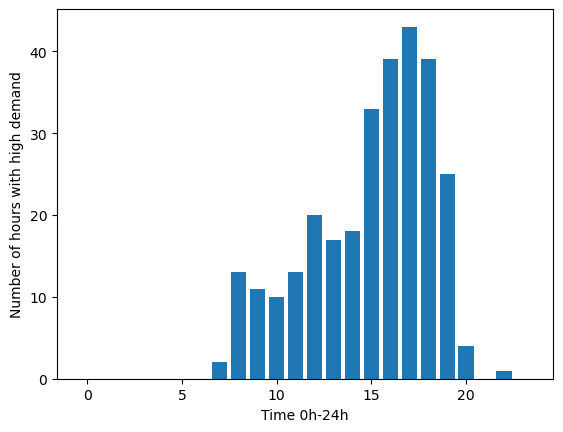

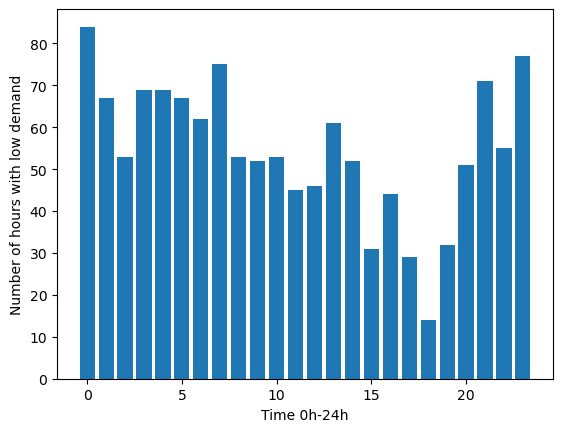

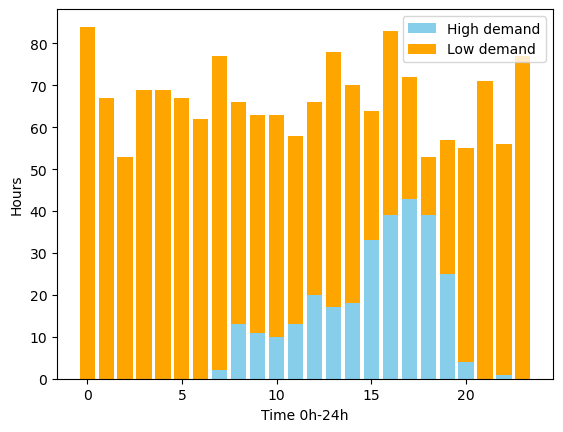

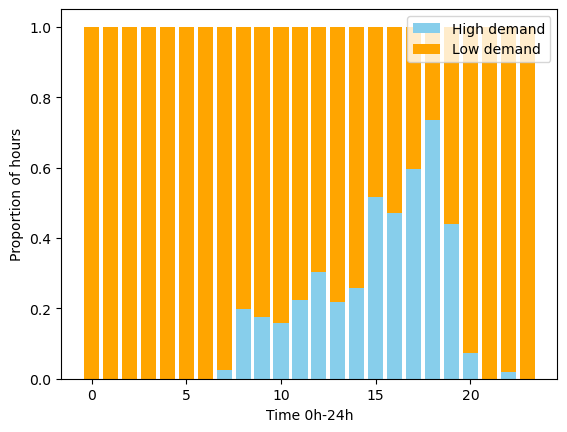

In [20]:
plt.figure()
plt.bar(hours,hours_high_demand)
plt.xlabel('Time 0h-24h')
plt.ylabel('Number of hours with high demand')
plt.figure()
plt.bar(hours,hours_low_demand)
plt.xlabel('Time 0h-24h')
plt.ylabel('Number of hours with low demand')
plt.figure()
plt.bar(hours,hours_high_demand,color='skyblue',label='High demand')
plt.bar(hours,hours_low_demand,bottom=hours_high_demand,color='orange',label='Low demand')
plt.xlabel('Time 0h-24h')
plt.ylabel('Hours')
plt.legend()
plt.figure()
total_hours = np.add(hours_high_demand,hours_low_demand)
plt.bar(hours,hours_high_demand/total_hours,color='skyblue',label='High demand')
plt.bar(hours,hours_low_demand/total_hours,bottom=hours_high_demand/total_hours,color='orange',label='Low demand')
plt.xlabel('Time 0h-24h')
plt.ylabel('Proportion of hours')
plt.legend()

In [21]:
# Different weeks
dws = sorted(data['day_of_week'].unique())
dw_high_demand = []
dw_low_demand = []
for dw in dws:
  dw_high_demand.append(len(data.query("day_of_week == @dw and increase_stock == 'high_bike_demand'")))
  dw_low_demand.append(len(data.query("day_of_week == @dw and increase_stock == 'low_bike_demand'")))

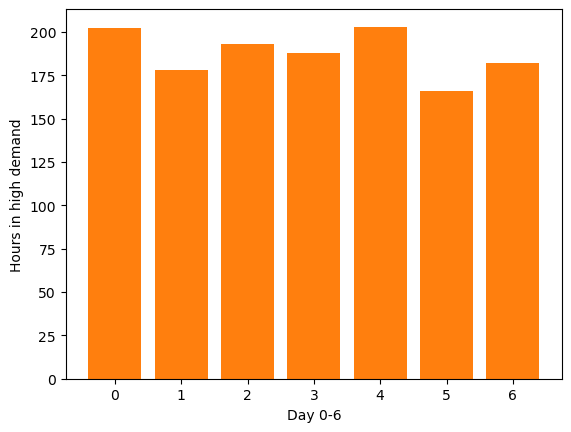

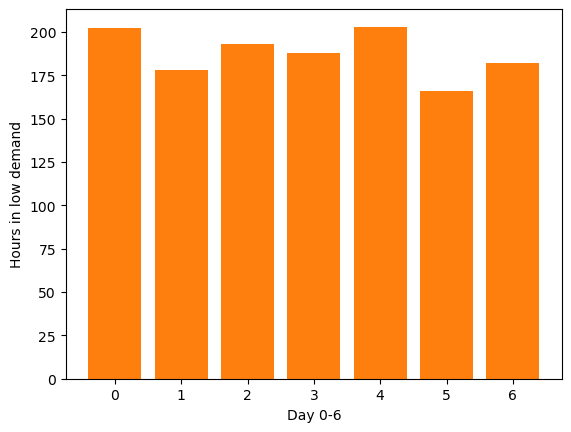

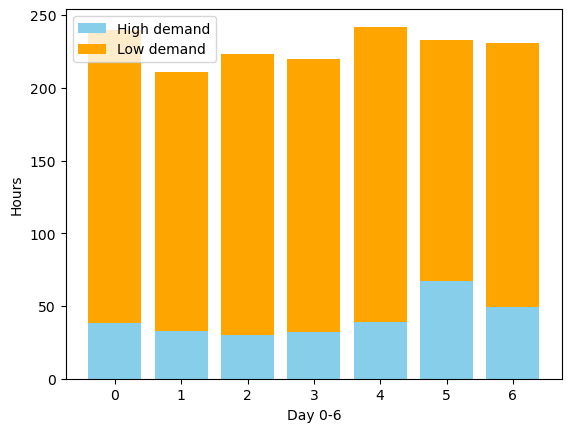

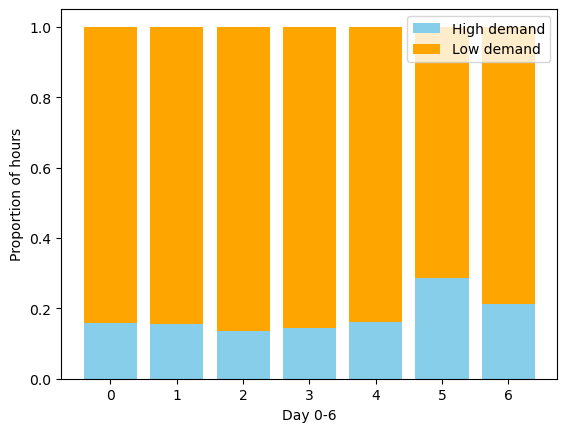

In [22]:
plt.figure()
plt.bar(dws,dw_high_demand)
plt.xlabel('Day 0-6')
plt.ylabel('Hours in high demand')
plt.bar(dws,dw_low_demand)
plt.figure()
plt.bar(dws,dw_high_demand)
plt.xlabel('Day 0-6')
plt.ylabel('Hours in low demand')
plt.bar(dws,dw_low_demand)
plt.figure()
plt.bar(dws,dw_high_demand,color='skyblue',label='High demand')
plt.bar(dws,dw_low_demand,bottom=dw_high_demand,color='orange',label='Low demand')
plt.xlabel('Day 0-6')
plt.ylabel('Hours')
plt.legend()
plt.figure()
total_hours = np.add(dw_high_demand,dw_low_demand)
plt.bar(dws,dw_high_demand/total_hours,color='skyblue',label='High demand')
plt.bar(dws,dw_low_demand/total_hours,bottom=dw_high_demand/total_hours,color='orange',label='Low demand')
plt.xlabel('Day 0-6')
plt.ylabel('Proportion of hours')
plt.legend()


In [23]:
# Different months
months = sorted(data['month'].unique())
month_high_demand = []
month_low_demand = []
for month in months:
  month_high_demand.append(len(data.query("month == @month and increase_stock == 'high_bike_demand'")))
  month_low_demand.append(len(data.query("month == @month and increase_stock == 'low_bike_demand'")))

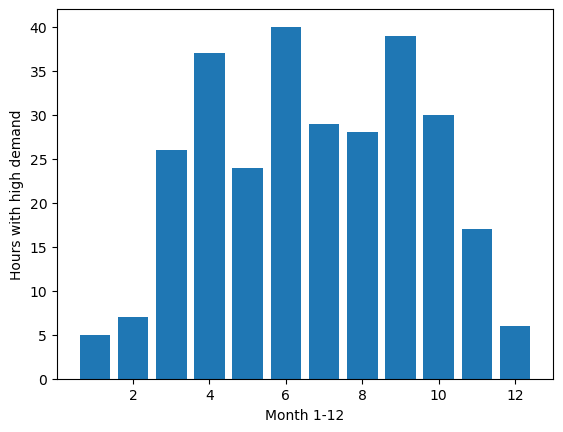

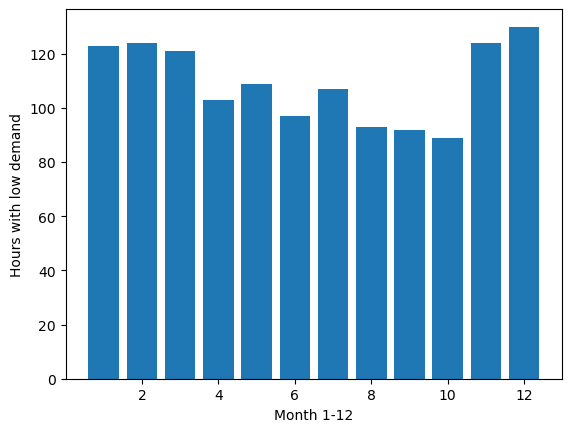

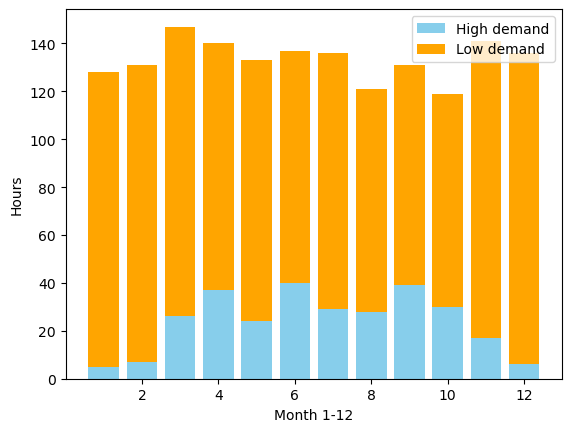

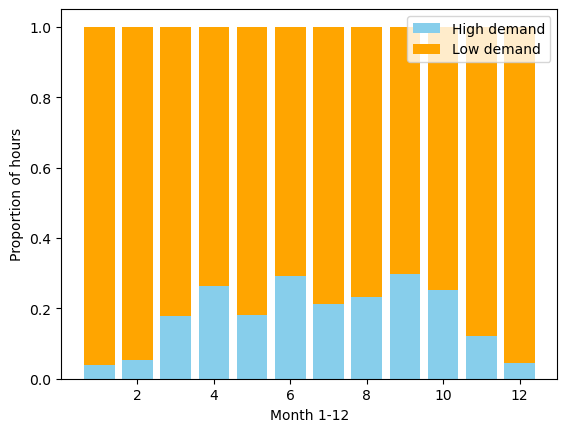

In [24]:
plt.figure()
plt.bar(months,month_high_demand)
plt.xlabel('Month 1-12')
plt.ylabel('Hours with high demand')
plt.figure()
plt.bar(months,month_low_demand)
plt.xlabel('Month 1-12')
plt.ylabel('Hours with low demand')
plt.figure()
plt.bar(months,month_high_demand,color='skyblue',label='High demand')
plt.bar(months,month_low_demand,bottom=month_high_demand,color='orange',label='Low demand')
plt.xlabel('Month 1-12')
plt.ylabel('Hours')
plt.legend()
plt.figure()
total_hours = np.add(month_high_demand,month_low_demand)
plt.bar(months,month_high_demand/total_hours,color='skyblue',label='High demand')
plt.bar(months,month_low_demand/total_hours,bottom=month_high_demand/total_hours,color='orange',label='Low demand')
plt.xlabel('Month 1-12')
plt.ylabel('Proportion of hours')
plt.legend()

In the next cell we test for the diferent correlations.

We remove three columns [dew, snow, weekday] because they are highly correlated with other columns.

We keep all the others for now, we may remove ones later.

C:\Users\Vencel\AppData\Local\Temp\ipykernel_2852\2068368876.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


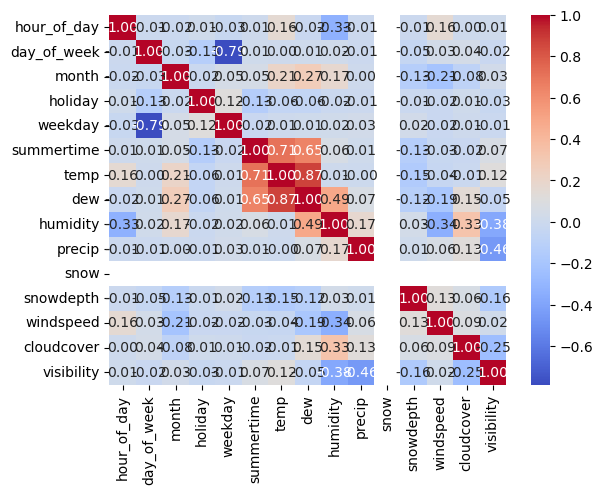

In [25]:
import seaborn as sns
# Weekdays and holidays
# Weekdays correlated to days as weekdays are just 0-5, weekends are 0-2
correlation_matrix = data.corr()
# Plotting the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

<Axes: >

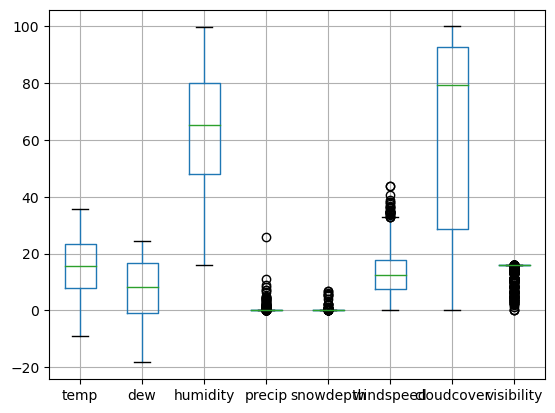

In [26]:
# Do some bar plots of numerical values
numerical.boxplot()

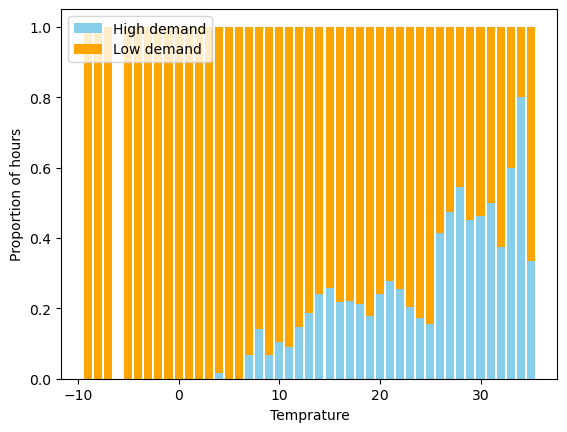

In [27]:
# Temprature
data['itemp'] = data['temp'].astype(int)
temps = data['itemp']
temps_high_demand = []
temps_low_demand = []
for temp in temps:
  temps_high_demand.append(len(data.query("itemp == @temp and increase_stock == 'high_bike_demand'")))
  temps_low_demand.append(len(data.query("itemp == @temp and increase_stock == 'low_bike_demand'")))
plt.figure()
total_hours = np.add(temps_high_demand,temps_low_demand)
plt.bar(temps,temps_high_demand/total_hours,color='skyblue',label='High demand')
plt.bar(temps,temps_low_demand/total_hours,bottom=temps_high_demand/total_hours,color='orange',label='Low demand')
plt.xlabel('Temprature')
plt.ylabel('Proportion of hours')
plt.legend()

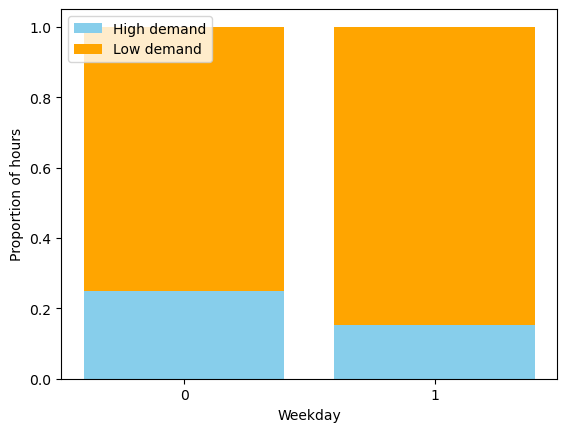

In [28]:
#Weekdays
weekdays = data['weekday']
weekday_high_demand = []
weekday_low_demand = []
for weekday in weekdays:
  weekday_high_demand.append(len(data.query("weekday == @weekday and increase_stock == 'high_bike_demand'")))
  weekday_low_demand.append(len(data.query("weekday == @weekday and increase_stock == 'low_bike_demand'")))
plt.figure()
total_hours = np.add(weekday_high_demand,weekday_low_demand)
plt.bar(weekdays,weekday_high_demand/total_hours,color='skyblue',label='High demand')
plt.bar(weekdays,weekday_low_demand/total_hours,bottom=weekday_high_demand/total_hours,color='orange',label='Low demand')
plt.xlabel('Weekday')
plt.ylabel('Proportion of hours')
plt.xticks([0,1])
plt.legend()

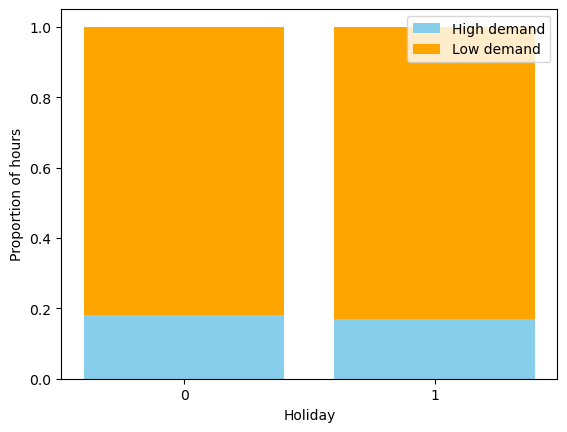

In [29]:
#Holiday
holidays = data['holiday']
holiday_high_demand = []
holiday_low_demand = []
for holiday in holidays:
  holiday_high_demand.append(len(data.query("holiday == @holiday and increase_stock == 'high_bike_demand'")))
  holiday_low_demand.append(len(data.query("holiday == @holiday and increase_stock == 'low_bike_demand'")))
plt.figure()
total_hours = np.add(holiday_high_demand,holiday_low_demand)
plt.bar(holidays,holiday_high_demand/total_hours,color='skyblue',label='High demand')
plt.bar(holidays,holiday_low_demand/total_hours,bottom=holiday_high_demand/total_hours,color='orange',label='Low demand')
plt.xlabel('Holiday')
plt.ylabel('Proportion of hours')
plt.xticks([0,1])
plt.legend()

# Importing packages

In [30]:
import numpy as np
import pandas as pd

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Train - valid - test split

In [31]:
#just importing the feature manipulation here
filtered = data.drop(['precip', 'holiday', 'snowdepth', 'snow', 'dew'], axis=1)
data_set = filtered
data_set['rushhour'] = filtered['hour_of_day'].apply(lambda x: 1 if x > 2 and x < 8 else 0)
data_set['goodtemp'] = filtered['temp'].apply(lambda x: 1 if x>25 else 0)

from sklearn.preprocessing import normalize
X = normalize(data_set.drop('increase_stock',axis=1))
y = data_set['increase_stock']

In [43]:
from sklearn.model_selection import train_test_split
X_in, X_valid, y_in, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)

In [44]:
def print_metrics(model,X_test,y_test):
  y_preds = model.predict(X_test)
  y_test = np.array(y_test).reshape(-1)
  #Confusion Matrix
  cross_vals=pd.crosstab(y_preds, y_test)
  print(cross_vals)
  #True positive (Estimated true and is true)
  TP = cross_vals.iloc[1,1]
  #False positive (Estimated true and is false)
  FP = cross_vals.iloc[1,0]
  #True negative (Estiamted false and is false)
  TN = cross_vals.iloc[0,0]
  #False negative (Estimated false and is true)
  FN = cross_vals.iloc[0,1]
  missclassification_rate = np.mean([y_preds != y_test])
  print(f"Missclassification {missclassification_rate}")
  accuracy = 1-missclassification_rate
  print(f"Accuracy {accuracy}")
  recall = TP/(TP+FN)
  print(f"Recall {recall}")
  precision = TP/(TP+FP)
  print(f"Precision {precision}")
  specificity = TN/(TN+FP)
  print(f"Specificity {specificity}")
  beta = 0.25
  F_beta = ((1+beta**2) *precision * recall) / (beta**2 * precision + recall)
  print(f"F_beta {F_beta}")

# Logistic Regression

In [34]:
# model = skl_lm.LogisticRegression(solver='liblinear')

# model.fit(X_train, y_train)

# print_metrics(model, X_test, y_test)

# prediction = model.predict(X_test)
# numerical_prediction = [(0 if i == 'low_bike_demand' else 1) for i in prediction]

# confusion_matrix(y_test, prediction)
# missclassification = np.mean(y_test != prediction)

# Discriminate Analysis

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_in, y_in, test_size=0.20, random_state=1337)

In [36]:
model = skl_da.LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
print_metrics(model, X_test, y_test)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                24                8
low_bike_demand                 29              195
Missclassification 0.14453125
Accuracy 0.85546875
Recall 0.9605911330049262
Precision 0.8705357142857143
Specificity 0.4528301886792453
F_beta 0.8753630842355427


In [37]:
model1 = skl_da.QuadraticDiscriminantAnalysis(reg_param=0.005)
model2 = skl_da.QuadraticDiscriminantAnalysis(reg_param=0)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
print_metrics(model1, X_test, y_test)
print_metrics(model2, X_test, y_test)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                17                6
low_bike_demand                 36              197
Missclassification 0.1640625
Accuracy 0.8359375
Recall 0.9704433497536946
Precision 0.8454935622317596
Specificity 0.32075471698113206
F_beta 0.8519460697023659
col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                43               38
low_bike_demand                 10              165
Missclassification 0.1875
Accuracy 0.8125
Recall 0.812807881773399
Precision 0.9428571428571428
Specificity 0.8113207547169812
F_beta 0.9340659340659341


In [80]:
model = skl_da.QuadraticDiscriminantAnalysis(reg_param=0)
model.fit(X_in, y_in)
print_metrics(model, X_valid, y_valid)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                37               63
low_bike_demand                 13              207
Missclassification 0.2375
Accuracy 0.7625
Recall 0.7666666666666667
Precision 0.9409090909090909
Specificity 0.74
F_beta 0.9284960422163587


# K nearest neighbours

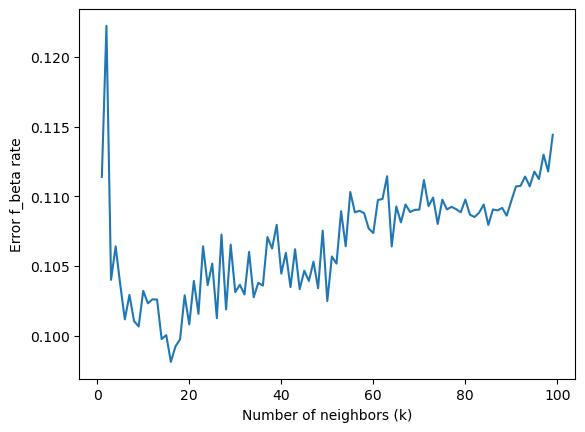

minimum is: 0.09812799614249852 at k=15


In [75]:
#elbow method for figuring out optimal number of k neighbours
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold

def metric_f_beta(y_test,y_preds):
  y_test = np.array(y_test).reshape(-1)
  #Confusion Matrix
  cross_vals=pd.crosstab(y_preds, y_test)
  #True positive (Estimated true and is true)
  TP = cross_vals.iloc[1,1]
  #False positive (Estimated true and is false)
  FP = cross_vals.iloc[1,0]
  #True negative (Estiamted false and is false)
  TN = cross_vals.iloc[0,0]
  #False negative (Estimated false and is true)
  FN = cross_vals.iloc[0,1]
  recall = TP/(TP+FN)
  precision = TP/(TP+FP)
  beta = 0.25
  F_beta = ((1+beta*2) *precision * recall) / (beta*2 * precision + recall)
  return F_beta
n = [x for x in range(1,100)]
error_rates = []

kf = KFold(n_splits=5, random_state=42, shuffle=True)
y_in = np.array(y_in)
for j, (train_index, test_index) in enumerate(kf.split(X_in)):
  error_rate_i = []
  for i in n :
    model = skl_nb.KNeighborsClassifier(n_neighbors=i)
    model.fit(X_in[train_index], y_in[train_index])
    y_pred = model.predict(X_in[test_index])
    error_rate = 1-metric_f_beta(y_in[test_index], y_pred)
    error_rate_i.append(error_rate)
  error_rates.append(error_rate_i)

avg_errors = np.mean(np.array(error_rates), axis=0)

plt.plot(n, avg_errors)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Error f_beta rate')
plt.show()
print(f'minimum is: {np.min(avg_errors)} at k={np.argmin(avg_errors)}')

In [81]:
n = 8
model = skl_nb.KNeighborsClassifier(n_neighbors=n)
model.fit(X_in, y_in)
print_metrics(model, X_valid, y_valid)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                25               33
low_bike_demand                 25              237
Missclassification 0.18125
Accuracy 0.81875
Recall 0.8777777777777778
Precision 0.9045801526717557
Specificity 0.5
F_beta 0.9029583146571045


In [82]:
n = 15
model = skl_nb.KNeighborsClassifier(n_neighbors=n)
model.fit(X_in, y_in)
print_metrics(model, X_valid, y_valid)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                21               22
low_bike_demand                 29              248
Missclassification 0.159375
Accuracy 0.840625
Recall 0.9185185185185185
Precision 0.8953068592057761
Specificity 0.42
F_beta 0.8966397277754148


# Tree based methods

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_in, y_in)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\Vencel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
123 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vencel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Vencel\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Vencel\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Vencel\anaconda3\Lib\site-pa

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [86]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [87]:
model = RandomForestClassifier(n_estimators=200, max_depth=50, min_samples_leaf=1, min_samples_split=2, bootstrap=True, max_features='sqrt')
model.fit(X_in, y_in)
print_metrics(model, X_valid, y_valid)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                25               22
low_bike_demand                 25              248
Missclassification 0.146875
Accuracy 0.853125
Recall 0.9185185185185185
Precision 0.9084249084249084
Specificity 0.5
F_beta 0.9090125053902544


In [88]:
model = RandomForestClassifier(n_estimators=300, max_depth=100, min_samples_leaf=4, min_samples_split=8)
model.fit(X_in, y_in)
print_metrics(model, X_valid, y_valid)

col_0             high_bike_demand  low_bike_demand
row_0                                              
high_bike_demand                24               26
low_bike_demand                 26              244
Missclassification 0.1625
Accuracy 0.8375
Recall 0.9037037037037037
Precision 0.9037037037037037
Specificity 0.48
F_beta 0.9037037037037037
